In [1]:
import numpy as np
import matplotlib.pyplot as plt

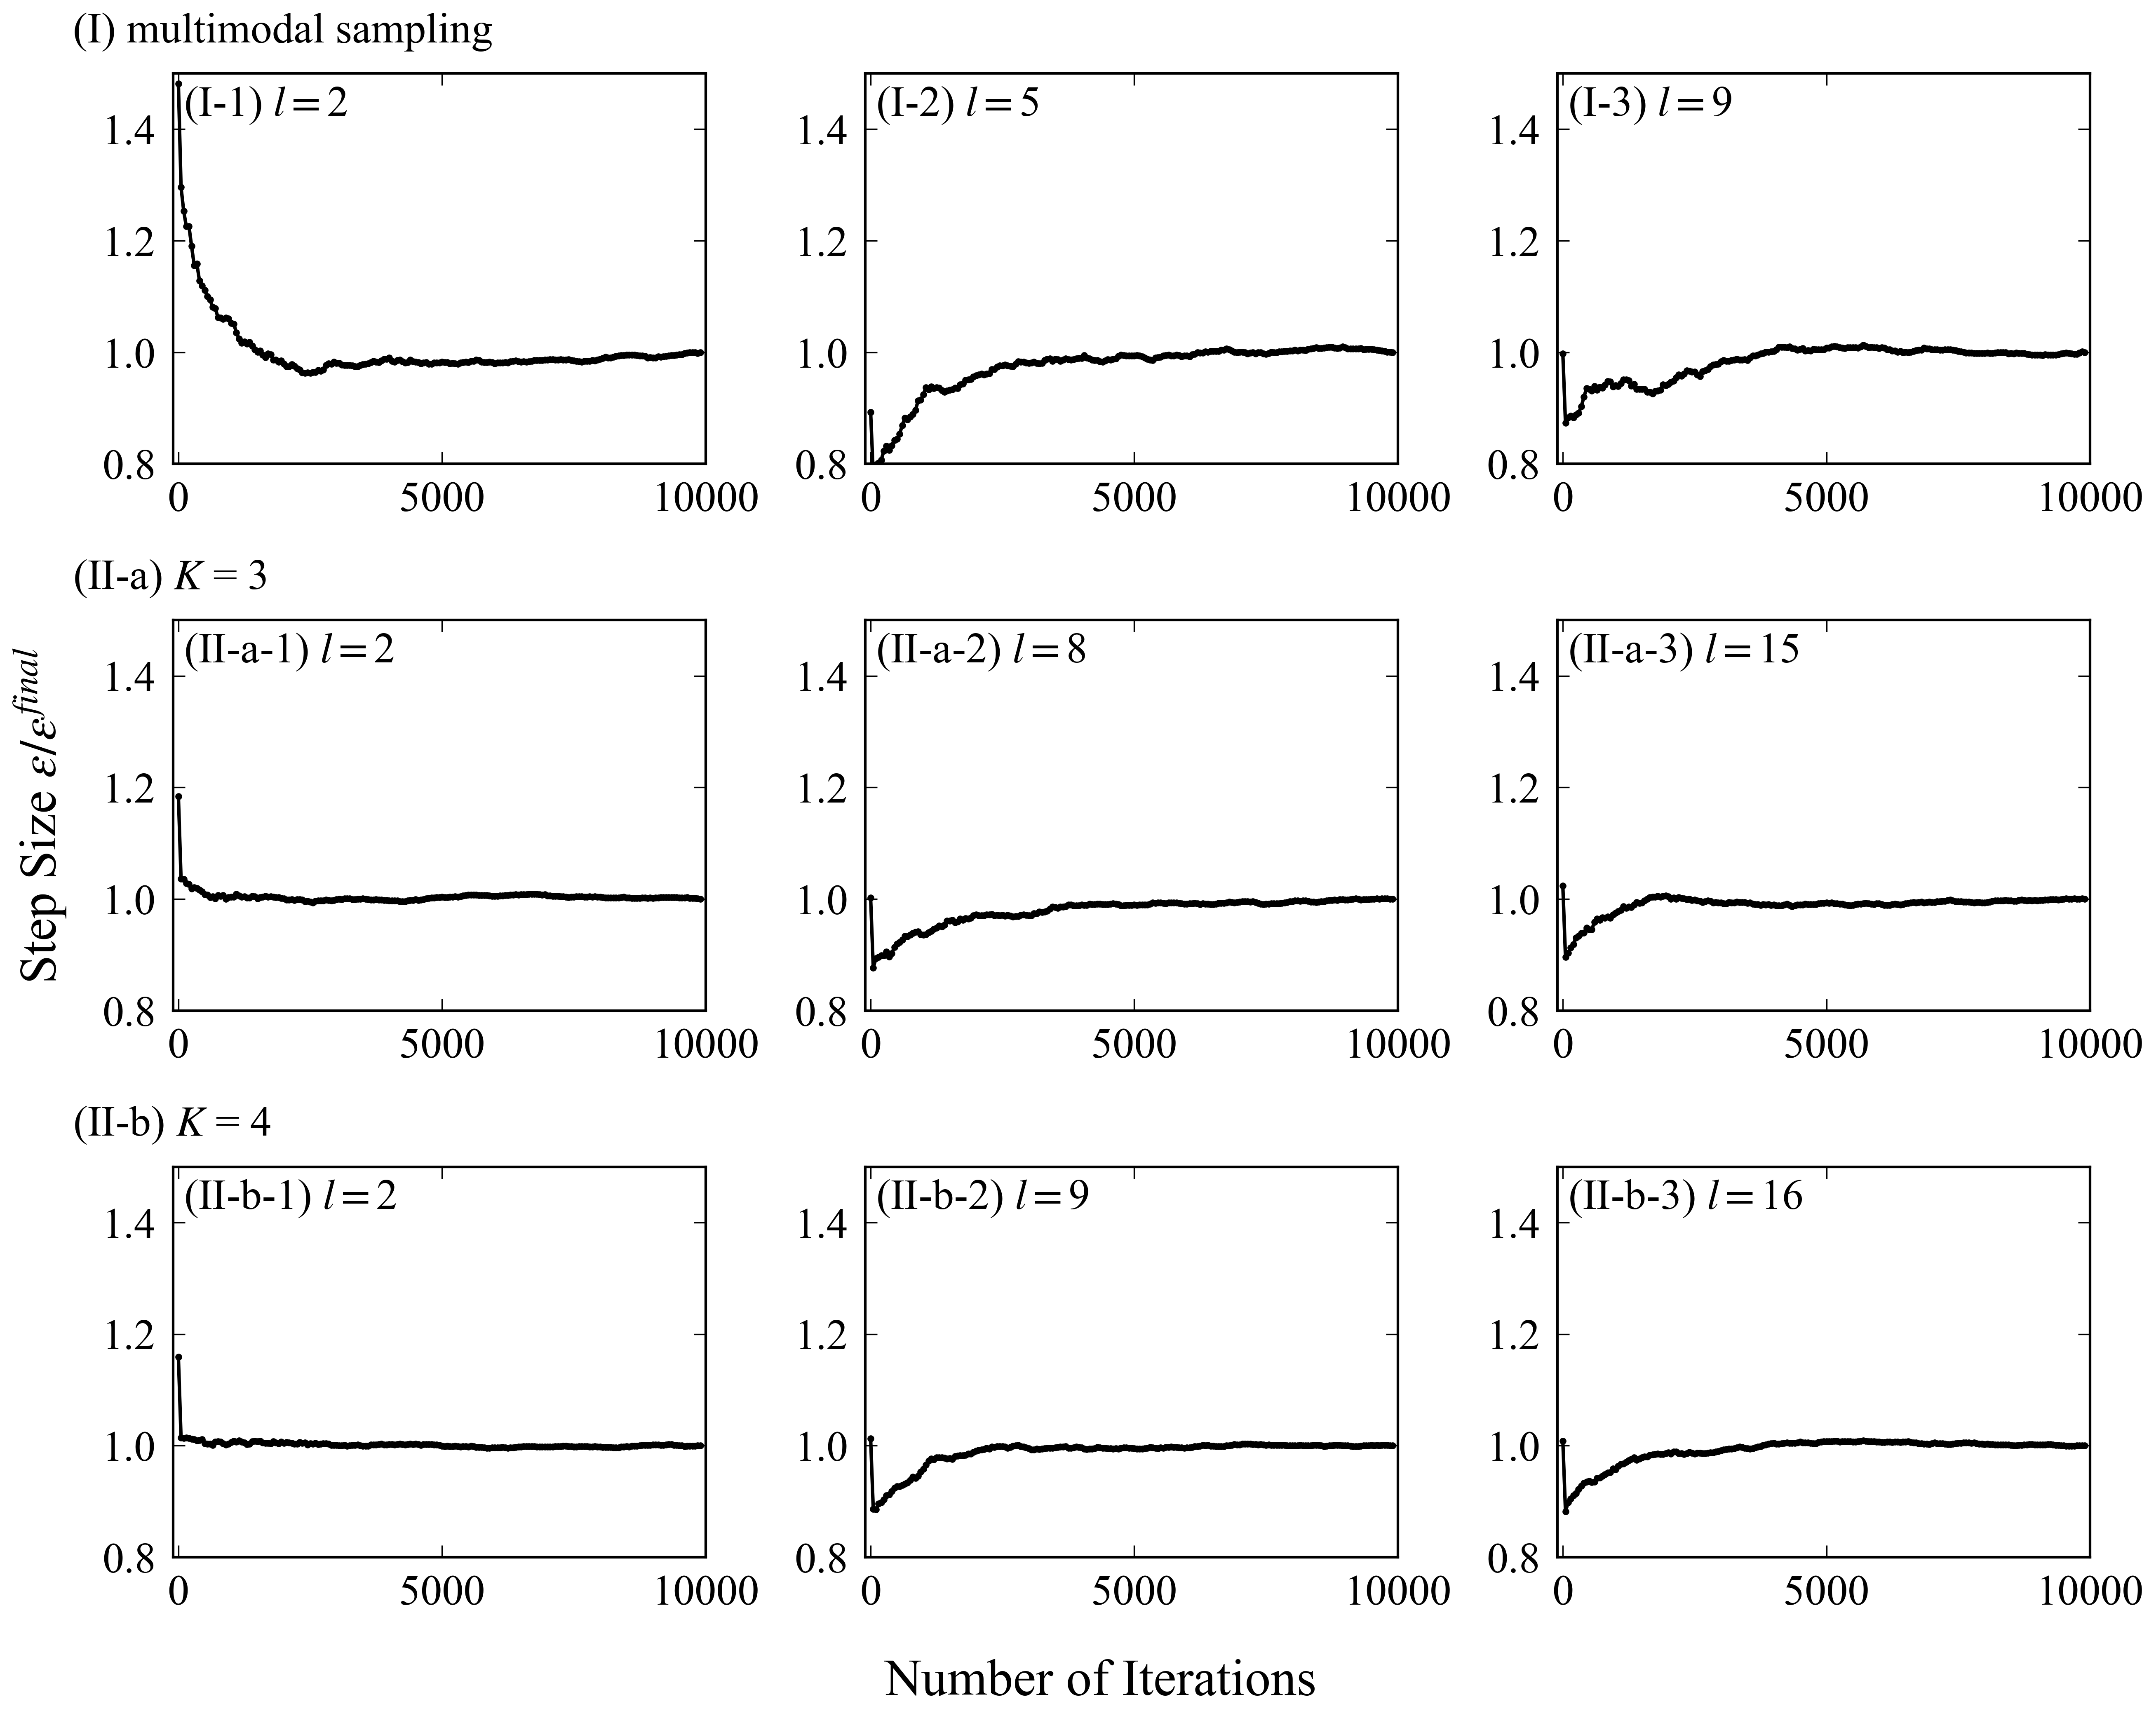

In [4]:
Title_name = ["(I) multimodal sampling", "(II-a) $K$ = 3","(II-b) $K$ = 4"]
Label_name = ["1)", "2)", "3)"]
Label_name_2 = ["(I-", "(II-a-", "(II-b-"]
experiment_array = ["multimodal_sampling","spectral_deconvolution","spectral_deconvolution_K_4"]
l_array = [[1,4,8],[1, 7, 14],[1, 8, 15]]
update_num = 199
parameter_num_array = [2,9,12]
xmin = -100
xmax = 10000
ymin = 0.8
ymax = 1.5
iter = 0
x_array = np.arange(0,9949,50)
fig, axss = plt.subplots(3,3,figsize=(20,15),dpi = 300)
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25

for iter, axs in enumerate(axss):
    folder_base = "../" + str(experiment_array[iter]) + "/output/SEMC_hyperparameter/"   
    for iter_2, ax in enumerate(axs):
        file_name = "step_sizes_" + str(l_array[iter][iter_2]) + ".txt"
        l = open(folder_base + file_name, "r").readlines()
        step_size = np.zeros((update_num, parameter_num_array[iter]))
        for i in range(update_num):
            for j in range(parameter_num_array[iter]):
                s = l[i*parameter_num_array[iter] + j].split()[1]
                step_size[i,j] = float(s)
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7, pad = 10)
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        ax.plot(x_array, np.mean(step_size[:,:], axis = 1)/np.mean(step_size[-1,:]), label = "AutoEMC", marker = "o", markersize = 3, linewidth = 2, color = "black")
        ax.text(xmin*-1,ymax*0.95,Label_name_2[iter] + Label_name[iter_2] + " $l = $" + str(l_array[iter][iter_2] + 1),fontsize = 25)
    axs[0].text(xmin*20, ymax*1.05, Title_name[iter], va='center')
plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.supylabel(r"Step Size $\epsilon/\epsilon^{final}$",x = 0.06, y = 0.5)
fig.supxlabel("Number of Iterations",x = 0.5, y = 0.02)
plt.savefig("../../../MonteCarloPaper/日本語版/figure/step_size", bbox_inches="tight")

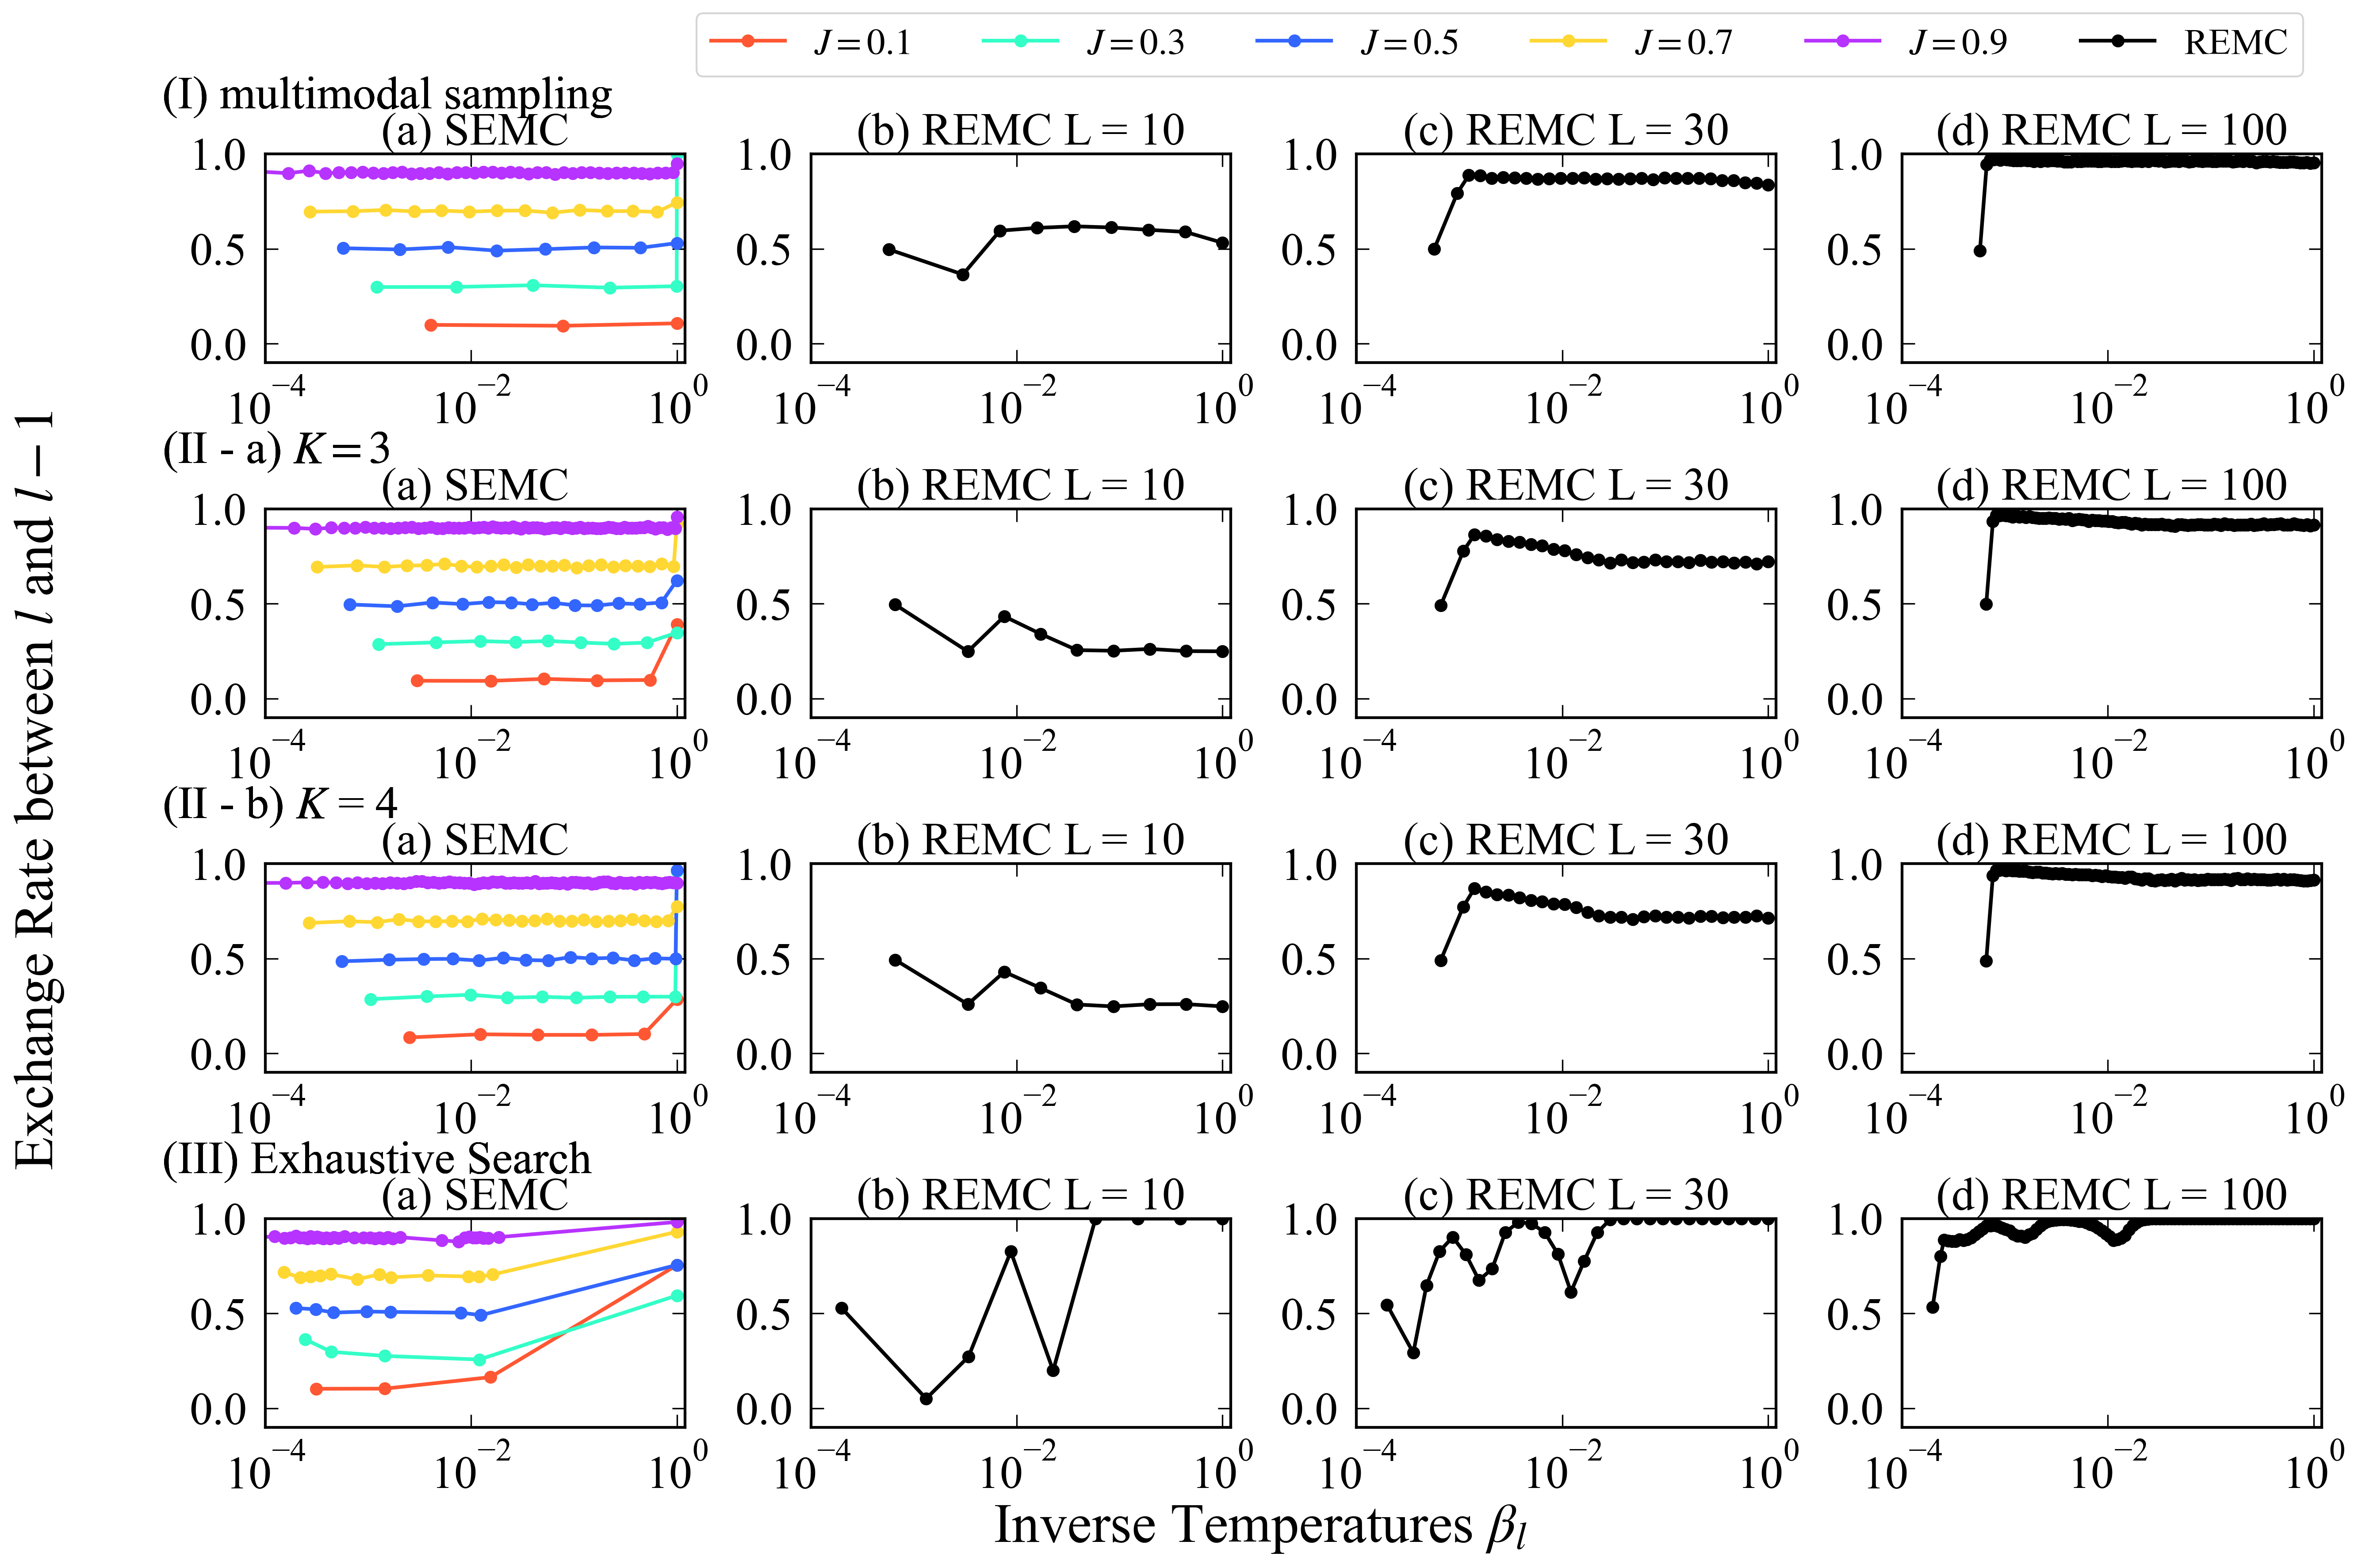

In [3]:
fig, axs = plt.subplots(4, 4, dpi=300, figsize=(20,12))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
sample_2 = 1000
Title_name = ["(I) multimodal sampling", "(II - a) $K = 3$","(II - b) $K$ = 4","(III) Exhaustive Search"]
experiment_array = ["multimodal_sampling","spectral_deconvolution","spectral_deconvolution_K_4","exhaustive_search"]
folder_array = ["SEMC_hyperparameter/", "EMC_hyperparameter/burn_in_" + str(sample) + "_L_" + str(10) + "/trial_0/","EMC_hyperparameter/burn_in_" + str(sample) + "_L_" + str(30) + "/trial_0/","EMC_hyperparameter/burn_in_" + str(sample) + "_L_" + str(100) + "/trial_0/"]
gamma_array = ["0.100000", "0.300000", "0.500000", "0.700000", "0.900000"]
# folder_array_2 = ["SEMC/burn_in_" + str(sample) + "_gamma_0.500000/trial_0/", "EMC/burn_in_" + str(sample_2) + "_L_" + str(10) + "/trial_0/","EMC/burn_in_" + str(sample_2) + "_L_" + str(30) + "/trial_0/","EMC/burn_in_" + str(sample_2) + "_L_" + str(100) + "/trial_0/"]
xmin_array = [0.0001,0.0001,0.0001,0.0001]
xmax = 1.2
ymin = -0.1
ymax = 1
text = ["(a) SEMC","(b) REMC L = 10","(c) REMC L = 30","(d) REMC L = 100"]
color = ['#FF5733', '#33FFC7', '#3366FF', '#FFD733', '#B733FF']
for iter in range(len(axs)):
    xmin = xmin_array[iter]
    folder_base = "../" + str(experiment_array[iter]) + "/output/"
    for i, ax in enumerate(axs[iter]):
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7, pad = 10)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        #y軸のメモリを[0.0,0.5,0.8,1.0]にする
        ax.set_yticks([0.0,0.5,1.0])
        
        folder = folder_base + folder_array[i]
        if i == 0:
            for j, gamma_name in enumerate(gamma_array):
                folder_gamma = folder + "gamma_" + gamma_name + "/trial_0/"
                f = open(folder_gamma + "inverse_temperatures.txt", "r")
                l = f.readlines()
                L = float(l[0])
                temp = l[1].split()
                inverse_temperature = np.array([float(i) for i in temp])
                f = open(folder_gamma + "exchange_rate.txt", "r")
                l = f.readlines()
                temp = l[0].split()
                exchange_rate = np.array([float(i) for i in temp])
                if iter == 0:
                    ax.plot(inverse_temperature[1:], exchange_rate, marker = "o", color = color[j], linewidth = 2, label = "$J = " + str(float(gamma_name)) + "$")
                else:
                    ax.plot(inverse_temperature[1:], exchange_rate, marker = "o", color = color[j], linewidth = 2)
        else:
            f = open(folder + "inverse_temperatures.txt", "r")
            l = f.readlines()
            L = float(l[0])
            temp = l[1].split()
            inverse_temperature = np.array([float(i) for i in temp])
            f = open(folder + "exchange_rate.txt", "r")
            l = f.readlines()
            temp = l[0].split()
            exchange_rate = np.array([float(i) for i in temp])
            if iter == 0 and i == 1:
                ax.plot(inverse_temperature[1:], exchange_rate, marker = "o", color = "black", linewidth = 2, label = "REMC")
            else:
                ax.plot(inverse_temperature[1:], exchange_rate, marker = "o", color = "black", linewidth = 2)
        ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.05,text[i], ha='center')
        axs[iter][0].text(xmin*0.1, ymax*1.3, Title_name[iter], ha='left', va='center')
fig.supylabel("Exchange Rate between $l$ and $l-1$",x = 0.03, y = 0.5)
fig.supxlabel(r"Inverse Temperatures $\beta_l$",x = 0.5, y = 0.02)
fig.legend(fontsize = 20, loc = "upper right", ncol = 6, bbox_to_anchor=(0.9, 1.0))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
# plt.legend(fontsize = 20)
plt.savefig("../../../MonteCarloPaper/日本語版/figure/exchange_rate", bbox_inches="tight")
plt.show()
    

9
15
16


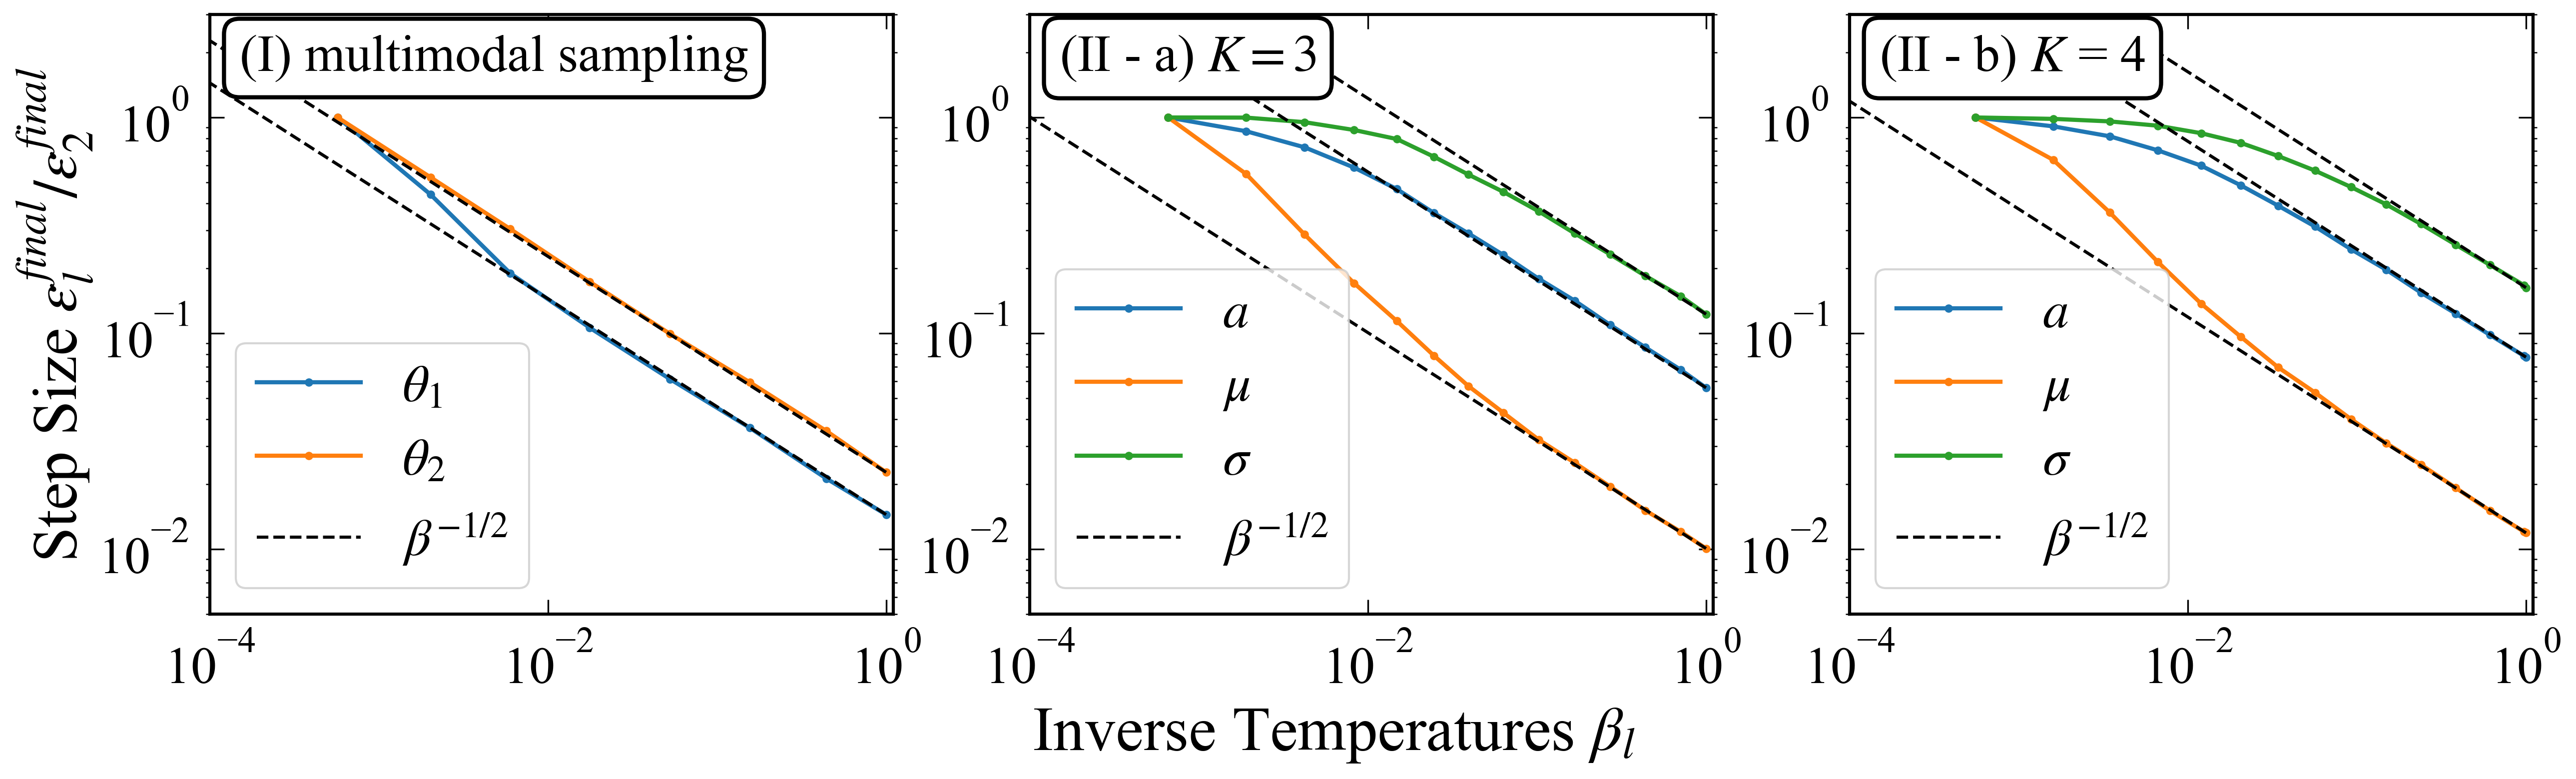

In [7]:
Title_name = ["(I) multimodal sampling", "(II - a) $K = 3$","(II - b) $K$ = 4"]
update_num = 199
parameter_num_array = [2,9,12]
xmin_array = [0.0001,0.0001,0.0001]
xmax = 1.1
ymin = 0.005
ymax = 3
iter = 0
x_array = np.arange(0,9949,50)
fig, axs = plt.subplots(1,3,figsize=(20,5),dpi = 300)
sample = 10000
experiment_array = ["multimodal_sampling","spectral_deconvolution","spectral_deconvolution_K_4"]
spines = 1.5
boxdic = {
    "facecolor" : "white",
    "edgecolor" : "black",
    "boxstyle" : "Round",
    "linewidth" : 2
}
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
for iter, ax in enumerate(axs):
    xmin = xmin_array[iter]
    folder_base = "../" + str(experiment_array[iter]) + "/output/SEMC_hyperparameter/"   
    file_name = "gamma_0.500000/trial_0/inverse_temperatures.txt"
    l = open(folder_base + file_name, "r").readlines()
    L = int(l[0])
    print(L)
    temp = l[1].split()
    inverse_temperature = np.array([float(i) for i in temp])
    step_size_array = np.zeros((parameter_num_array[iter],L))
    ax.spines["top"].set_linewidth(spines)
    ax.spines["left"].set_linewidth(spines)
    ax.spines["bottom"].set_linewidth(spines)
    ax.spines["right"].set_linewidth(spines)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(direction = "in", length = 7, pad = 10)
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    ax.set_xscale("log")
    ax.set_yscale("log")
    for ll in range(1,L):
        file_name = "step_sizes_" + str(ll) + ".txt"
        l = open(folder_base + file_name, "r").readlines()
        step_size = np.zeros((update_num, parameter_num_array[iter]))
        for i in range(update_num):
            for j in range(parameter_num_array[iter]):
                s = l[i*parameter_num_array[iter] + j].split()[1]
                step_size[i,j] = float(s)
        step_size_array[:,ll] = step_size[-1,:]
        # step_size_array[:,ll] =  step_size_array[:,ll]/step_size_array[:,1]
    for ll in range(L-1,0,-1):
        step_size_array[:,ll] =  step_size_array[:,ll]/step_size_array[:,1]
    x_lines = np.array([1, 0.0001])
    if iter == 0:
        lines = np.zeros((2,2))
        lines[0,0] = step_size_array[0][-1]
        lines[0,1] = step_size_array[0][-1]*100
        lines[1,0] = step_size_array[1][-1]
        lines[1,1] = step_size_array[1][-1]*100
        ax.plot(inverse_temperature[1:],step_size_array[0][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\theta_1$")
        ax.plot(inverse_temperature[1:],step_size_array[1][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\theta_2$")
        ax.plot(x_lines,lines[0,:], linestyle = "dashed", color = "black")
        ax.plot(x_lines,lines[1,:], linestyle = "dashed", color = "black", label = r"$\beta^{-1/2}$")
        #左下に凡例を表示
        ax.legend(fontsize = 25, loc = "lower left") 
    elif iter == 1:
        step_size_plot = np.zeros((3,L))
        for i in range(parameter_num_array[iter]):
            step_size_plot[i%3,:] += step_size_array[i,:]
        step_size_plot = step_size_plot/3
        lines = np.zeros((3,2))
        lines[0,0] = step_size_plot[0][-1]
        lines[0,1] = step_size_plot[0][-1]*100
        lines[1,0] = step_size_plot[1][-1]
        lines[1,1] = step_size_plot[1][-1]*100
        lines[2,0] = step_size_plot[2][-1]
        lines[2,1] = step_size_plot[2][-1]*100
        ax.plot(inverse_temperature[1:],step_size_plot[0][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$a$")
        ax.plot(inverse_temperature[1:],step_size_plot[1][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\mu$")
        ax.plot(inverse_temperature[1:],step_size_plot[2][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\sigma$")
        ax.plot(x_lines,lines[0,:], linestyle = "dashed", color = "black")
        ax.plot(x_lines,lines[1,:], linestyle = "dashed", color = "black")
        ax.plot(x_lines,lines[2,:], linestyle = "dashed", color = "black", label = r"$\beta^{-1/2}$")
        ax.legend(fontsize = 25)
    else:
        step_size_plot = np.zeros((3,L))
        for i in range(parameter_num_array[iter]):
            step_size_plot[i%3,:] += step_size_array[i,:]
        step_size_plot = step_size_plot/4
        
        lines = np.zeros((3,2))
        lines[0,0] = step_size_plot[0][-1]
        lines[0,1] = step_size_plot[0][-1]*100
        lines[1,0] = step_size_plot[1][-1]
        lines[1,1] = step_size_plot[1][-1]*100
        lines[2,0] = step_size_plot[2][-1]
        lines[2,1] = step_size_plot[2][-1]*100
        ax.plot(inverse_temperature[1:],step_size_plot[0][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$a$")
        ax.plot(inverse_temperature[1:],step_size_plot[1][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\mu$")
        ax.plot(inverse_temperature[1:],step_size_plot[2][1:], marker = "o", markersize = 3, linewidth = 2,label = r"$\sigma$")
        ax.plot(x_lines,lines[0,:], linestyle = "dashed", color = "black")
        ax.plot(x_lines,lines[1,:], linestyle = "dashed", color = "black")
        ax.plot(x_lines,lines[2,:], linestyle = "dashed", color = "black", label = r"$\beta^{-1/2}$")
        ax.legend(fontsize = 25)
    # Titleの名前をつける
    ax.text(0.00015, ymax*0.55,Title_name[iter], ha='left', backgroundcolor='white',bbox=boxdic)
fig.supylabel(r"Step Size $\epsilon^{final}_l/\epsilon^{final}_2$",x = 0.06, y = 0.5)
fig.supxlabel(r"Inverse Temperatures $\beta_l$",x = 0.5, y = -0.1)
plt.savefig("../../../MonteCarloPaper/日本語版/figure/adjustedstep", bbox_inches="tight")
plt.show()